In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Dataset 2
## Load the dataset into pandas dataframe

In [2]:
# Load the dataset
data = pd.read_csv('./data_set_2.csv', header = None)

In [3]:
data = data.rename(columns={0: "Index", 1: "X1", 2: "X2"}, errors="raise")

In [4]:
data.head()

,Index,X1,X2
0,1,0.975386,0.736608
1,2,0.975795,0.737679
2,3,0.976239,0.739043
3,4,0.976501,0.739310
4,5,0.976856,0.739929


## Applying K-means Clustering to form clusters and then sample data points from each cluster. 
## Originally started with 50 clusters ut, data sampled doesn't cover outliers or points on the border. After experimenting, settled with 2500 clusters for even distribution of clusters and sampled 1 point from each cluster. 
## Also, applied DBSCAN clustering for comparison and found that selected samples from DBSCAN are not as good as kmeans with 2500 clusters

In [5]:
# Assume columns 'X1', 'X2', and 'Y' for Frequency, Power, and Vibration Level
# Only 'X1' and 'X2' will be used for sampling

# Step 1: Use K-Means to find high-density clusters in the normalized data
num_clusters = 2500  # Start with 50 clusters for density regions
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['X1', 'X2']])

# Step 2: Uniformly sample data within each cluster
sampled_data = pd.DataFrame()
samples_per_cluster = 2500 // num_clusters  # Number of samples per cluster

for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    if len(cluster_data) > samples_per_cluster:
        # Randomly sample within the cluster
        cluster_sample = cluster_data.sample(n=samples_per_cluster, random_state=42)
    else:
        # Take all if fewer samples than needed
        cluster_sample = cluster_data
    sampled_data = pd.concat([sampled_data, cluster_sample])

# Step 3: Add additional samples from high-density regions if fewer than 2500 samples
if len(sampled_data) < 2500:
    remaining_needed = 2500 - len(sampled_data)
    additional_samples = data.sample(n=remaining_needed, random_state=42)
    sampled_data = pd.concat([sampled_data, additional_samples])

## Save the sampled dataset to a CSV

In [6]:
# Reset index of the final sampled dataset
sampled_data = sampled_data.reset_index(drop=True)

# Save the sampled dataset
sampled_data.to_csv('sampled_data_set_2_kmeans_2500.csv', index=False)

## Visualization showing original dataset vs sampled dataset.
### Observations
* Sampled dataset covers all the outliers or boundary cases in the original dataset
* We can also notice that coverage is even while maintaining the density pattern in the original dataset

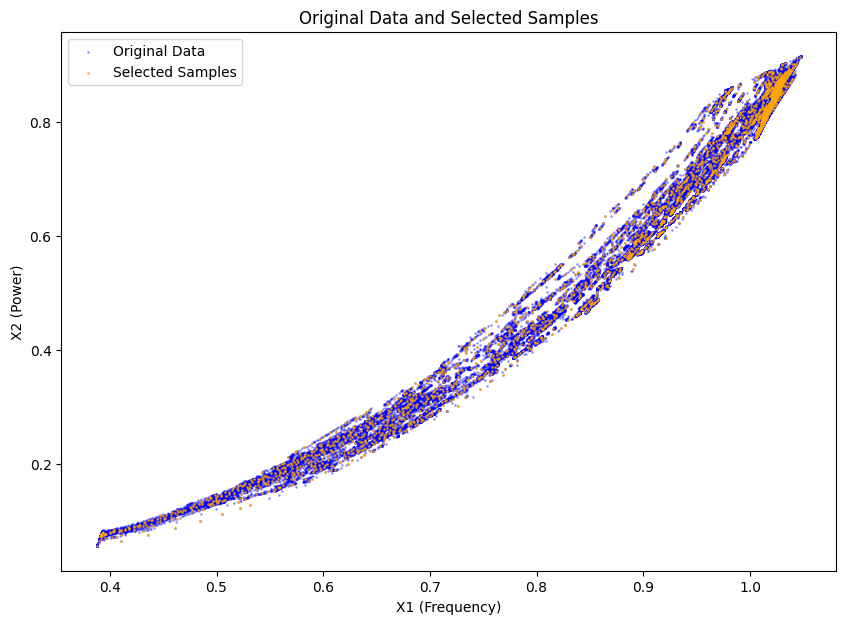

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and sampled data
original_data = pd.read_csv('data_set_2.csv', header = None)
original_data = original_data.rename(columns={0: "Index", 1: "X1", 2: "X2"}, errors="raise")
sampled_data = pd.read_csv('sampled_data_set_2_kmeans_2500.csv')

# Plot original data in blue
plt.figure(figsize=(10, 7))
plt.scatter(original_data['X1'], original_data['X2'], color='blue', label='Original Data', alpha=0.3, s=1)

# Plot sampled data in orange
plt.scatter(sampled_data['X1'], sampled_data['X2'], color='orange', label='Selected Samples', alpha=0.7, s=1)

# Add labels and title
plt.xlabel('X1 (Frequency)')
plt.ylabel('X2 (Power)')
plt.title('Original Data and Selected Samples')
plt.legend()
plt.savefig('original_vs_selected_kmeans_2500.png')
plt.show()

## Visualization showing data density in original data vs sampled data.
### Observations:
* We can identify that density peaks are common between both datasets

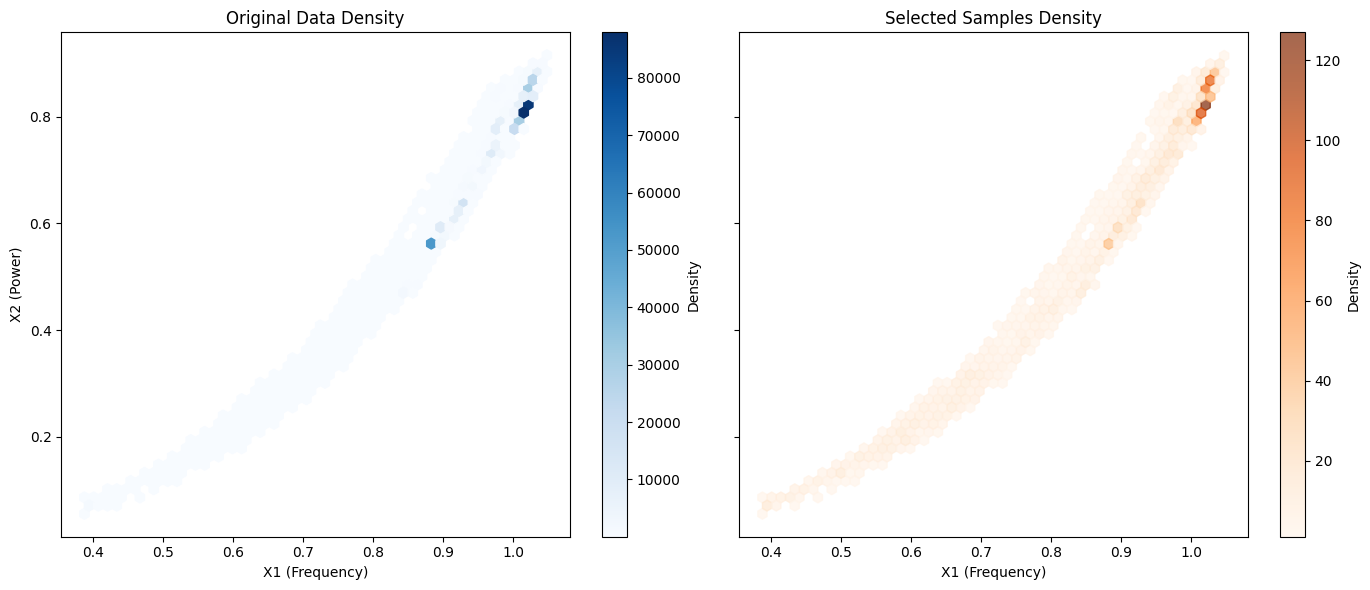

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original and sampled data
original_data = pd.read_csv('data_set_2.csv', header=None)
original_data = original_data.rename(columns={0: "Index", 1: "X1", 2: "X2"}, errors="raise")
sampled_data = pd.read_csv('sampled_data_set_2_kmeans_2500.csv')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Plot the density of original data
hb_original = ax1.hexbin(original_data['X1'], original_data['X2'], gridsize=50, cmap='Blues', mincnt=1)
ax1.set_xlabel('X1 (Frequency)')
ax1.set_ylabel('X2 (Power)')
ax1.set_title('Original Data Density')
cbar1 = fig.colorbar(hb_original, ax=ax1, label='Density')

# Plot the density of selected samples
hb_sampled = ax2.hexbin(sampled_data['X1'], sampled_data['X2'], gridsize=50, cmap='Oranges', mincnt=1, alpha=0.7)
ax2.set_xlabel('X1 (Frequency)')
ax2.set_title('Selected Samples Density')
cbar2 = fig.colorbar(hb_sampled, ax=ax2, label='Density')

# Show the plot
plt.tight_layout()
plt.show()